[![Run Jupyter Notebooks](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/RichardPotthoff/Notebooks/main?filepath=beta_testing.ipynb)   <- click here to open this file in MyBinder
   
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RichardPotthoff/Notebooks/blob/main/beta_testing.ipynb)   <- click here to open this file in Google Colab

# Tests

## Tests for global "window" instance

In [ ]:
%%js
//alert(document.body)
window.test={result:true}
//alert("test.result= "+test.result)

In [ ]:
%%js
alert("test.result= "+test.result)

| Implementation | Test Result |
|---|---|
| Pythonista Lab v1.0 b7 | **Alert** test.result= true |
| Carnets SCI (nb+lab+classic) | **Alert** test.result= true |
| MyBinder (nb+lab) | **Alert** test.result= true |
| Google Colab | *no output* |

## Test for "IPython", "Jupyter" in JavaScript

In [ ]:
%%js
alert(IPython)

| Implementation | Test Result |
|:---|:---|
| Pythonista Lab v1.0 b7 | *no output* |
| Carnets SCI (nb+lab) | Javascript Error: Can't find variable: IPython |
| Carnets SCI classic | [object Object] |
| MyBinder | Javascript Error: Can't find variable: IPython |
| Google Colab | *no output* |

In [ ]:
%%js
alert(Jupyter)

| Implementation | Test Result |
|:---|:---|
| Pythonista Lab v1.0 b7 | *no output* |
| Carnets SCI (nb+Lab) | Javascript Error: Can't find variable: Jupyter |
| Carnets SCI classic | [object Object] |
| MyBinder (nb+lab)| Javascript Error: Can't find variable: Jupyter |
| Google Colab | *no output* |

## Test for "element" in Javascript

In [ ]:
%%js
alert(element)

| Implementation | Test Result |
|:---|:---|
| Pythonista Lab v1.0 b7 | *no output* |
| Carnets SCI (nb+Lab) | [object HTMLDivElement] |
| Carnets SCI classic | [object Object] |
| MyBinder (nb+lab)| [object HTMLDivElement] |
| Google Colab | [object HTMLDivElement] |

## Console output tests

In [ ]:
%%js
console.log("My custom message");

| Implementation | Test Result |
|:---|:---|
| Pythonista Lab v1.0 b7 | *no output* |
| Carnets SCI (nb+Lab) | *no output* |
| Carnets SCI classic | *no output* |
| MyBinder (nb+lab)| *no output* |
| Google Colab | *no output* |

## Console hook tests

In [ ]:
%%js
try{console._o=console._o||{log:console.log,error:console.error,warn:console.warn,info:console.info};[['log'],['error','red'],['warn'],['info']].forEach(([t,c="black"])=>{console[t]=console._o[t];let d=element.consoleOutput;if(!d){d=document.createElement("div");d.id="console-output";d.style.cssText="white-space:pre-wrap;font-family:monospace;padding:0px;background:#f0f0f0;line-height:1.1;";element.appendChild(d);element.consoleOutput=d;}let o=console[t],n=o;while(n&&n.toString().indexOf("[native code]")<0)n=n.apply?function(...a){return n.apply(this,a);}:null;o=function(...a){(n||console._o[t]).apply(console,a);let s=a.map(e=>typeof e==='object'?JSON.stringify(e,null,2):e).join(' ');const m=document.createElement("div");m.innerHTML=`[${t.toUpperCase()}] ${s}`;m.style.cssText=`margin:0;line-height:1.1;padding:0px 0;color:${c};`;d.appendChild(m);};console[t]=o;});

console.log("My custom message");

}catch(e){console.error("Error:",e);}finally{[['log'],['error','red'],['warn'],['info']].forEach(([t])=>console._o&&console._o[t]&&(console[t]=console._o[t]));}

| Implementation | Test Result |
|:---|:---|
| Pythonista Lab v1.0 b7 | *no output* |
| Carnets SCI (nb+Lab) | [LOG] My custom message |
| Carnets SCI classic | *no output* |
| MyBinder (nb+lab)| [LOG] My custom message |
| Google Colab | [LOG] My custom message |

## Print pdf

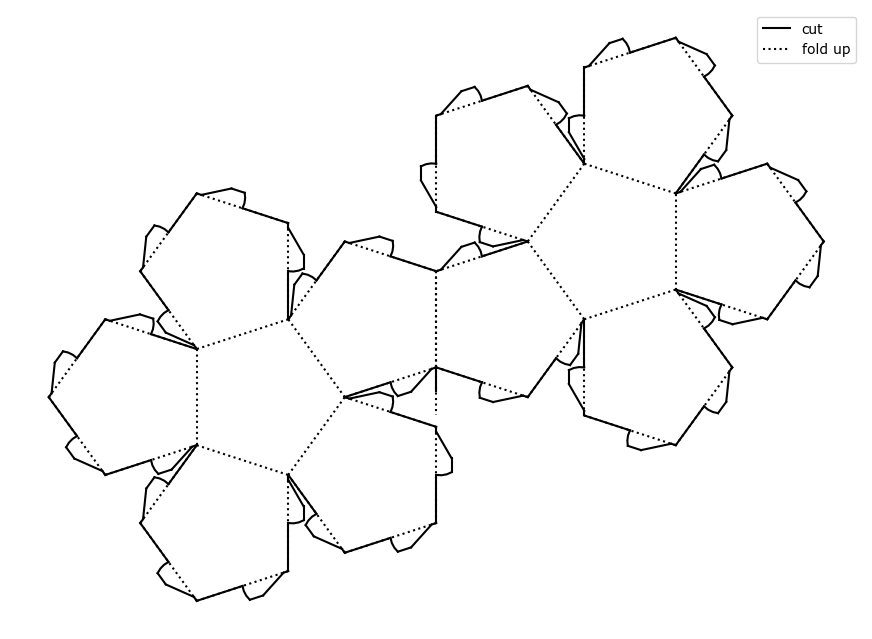

1.3763819204711745

In [1]:
#dodecahedron pattern 
from math import tan,sin
import numpy as np
from matplotlib import pyplot as plt
from cmath import pi,acos,exp,sqrt

def plotArc(ax,P0,n0,l,da,*args,tol=0.001,**kwargs):
  if l==0:
    return
  x=np.linspace(0,l,max(2,int(abs(6*(da/(2*pi)))),int(l//(2*abs(2*l/da*tol)**0.5)+1))if (da!=0) and (l!=0) else 2)
  phi2=x/l*da/2
  p=P0+x*np.sinc(phi2/pi)*n0*np.exp(1j*phi2)
  ax.plot(p.real,p.imag,*args,**kwargs)
    
def plotArcchain(ax,P0,n0,arcs,*args,**kwargs):
    p=P0
    n=n0
    for l,da in arcs:
        plotArc(ax,p,n,l,da,*args,**kwargs)
        p+=l*np.sinc(da/(2*pi))*n*exp(1j*da/2)
        n*=exp(1j*da)

deg=pi/180.0

pentagon=([(1.0,0),(0,72*deg)]*2+[(1,0),(0,-36*deg)]*2+[(1.0,0),(0,72*deg)])
scoreline=[(0.0,-108*deg)]+((pentagon*5)[2:-1]+[(0.0,-36*deg)] +(pentagon*5)[2:])+[(1.0,0),(0.0,180*deg),(1.5,0)]

fs=0.5#flap start
fsa=80*deg#start angle
fsb=20*deg#flap start edge curvature 80deg+20deg=100deg at root -> 'snap'-fit
fe=0.95#flap end
fea=30*deg#end angle
fw=0.16#flap width
flap=[(fs,0),(0.,-fsa-fsb),(fw/sin(fsa)*(fsb/sin(fsb) if fsb!=0.0 else 1.0),2*fsb),(0.0,fsa-fsb),
       (fe-fs-fw*(1/tan(fsa)+1/tan(fea)),0),(0,fea),(fw/sin(fea),0),(0,-fea),(1.0-fe,0)]
flapped_pentagon=[*flap,(0,72*deg)]*2+[*flap,(0,-144*deg)]+[*flap,(0.0,72*deg)]
cutline=[(0.0,-108*deg)]+(flapped_pentagon*5)[len(flap)+1:-1]+[(0.0,-36*deg)]+(flapped_pentagon*5)[len(flap)+1:-1]+[(0,-108*deg),(0.25,0)]


from matplotlib import pyplot as plt 
plt.close()
#DIN_A=4
#plt.figure(figsize=(1000*2**(-DIN_A/2+1/4)/25.4,1000*2**(-DIN_A/2-1/4)/25.4))
plt.figure(figsize=(11,8.5))
plotArcchain(plt.gca(),0.0,0.0 +1.0j,scoreline,'k:',)
plotArcchain(plt.gca(),0.0,0.0 +1.0j,cutline,'k-')
plt.plot(0,0,'k-',label='cut')
plt.plot(0,0,'k:',label='fold up')
plt.gca().set_aspect('equal')
xlim=plt.gca().get_xlim()
ylim=plt.gca().get_ylim()
plt.legend()
plt.gca().set_axis_off()
plt.savefig('dodecahedron.pdf')
plt.show()
(xlim[1]-xlim[0])/(ylim[1]-ylim[0])

| Implementation | Test Result |
|:---|:---|
| Pythonista Lab v1.0 b7 | ModuleNotFoundError: No module named 'fontTools', no pdf file (but plot in notebook O.K.) |
| Carnets SCI (nb+Lab+classic) | Notebooks/dodecahedron.pdf (10kB) |
| MyBinder (nb+lab)|  |
| Google Colab |  |

# Appendix

## Expanded console hook function

In [ ]:
%%js
try {
    // Store original system console methods
    console._o = console._o || {
        log: console.log,
        error: console.error,
        warn: console.warn,
        info: console.info
    };

    [['log'], ['error', 'red'], ['warn'], ['info']].forEach(([method, color = "black"]) => {
        // Reset to system console to clear prior hooks
        console[method] = console._o[method];

        // Create or reuse console-output div
        let consoleOutput = element.consoleOutput;
        if (!consoleOutput) {
            consoleOutput = document.createElement("div");
            consoleOutput.id = "console-output";
            consoleOutput.style.cssText = "white-space: pre-wrap; font-family: monospace; padding: 0px; background: #f0f0f0; line-height: 1.1;";
            element.appendChild(consoleOutput);
            element.consoleOutput = consoleOutput;
        }

        // Find native console by traversing chain
        let original = console[method], native = original;
        while (native && native.toString().indexOf("[native code]") < 0) {
            native = native.apply ? function(...args) { return native.apply(this, args); } : null;
        }

        // Define new hook
        original = function(...args) {
            (native || console._o[method]).apply(console, args); // Forward to native or original
            let message = args.map(arg => {
                return typeof arg === 'object' ? JSON.stringify(arg, null, 2) : arg;
            }).join(' ');
            const messageDiv = document.createElement("div");
            messageDiv.innerHTML = `[${method.toUpperCase()}] ${message}`;
            messageDiv.style.cssText = `margin: 0; line-height: 1.1; padding: 0px 0; color: ${color};`;
            consoleOutput.appendChild(messageDiv);
        };
        console[method] = original;
    });

    // Cell-specific code
    console.log("Test message 1");
    console.log({ key: "value" });
    console.error("Test error");
    console.warn("Test warning");
    console.info("Test info");
} catch (e) {
    console.error("Error:", e);
} finally {
    // Restore system console
    [['log'], ['error', 'red'], ['warn'], ['info']].forEach(([method]) => {
        if (console._o && console._o[method]) {
            console[method] = console._o[method];
        }
    });
}